# Organización de datos

## Grupo:

### Bacigaluppo, Ivan
### Irrazabal, Diego

# Github: 

In [77]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pyspark

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
%matplotlib inline

In [78]:
station = pd.read_csv('data/station.csv', low_memory=False)
#iter_status = pd.read_csv('data/status.csv', iterator = True, chunksize = 100000)

# Analizando weather.csv

In [79]:
weather = pd.read_csv('data/weather.csv',
                    parse_dates=['date'], infer_datetime_format=True,
                    low_memory=False)

In [80]:
print weather.shape
weather.columns.values

(3665, 24)


array(['date', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'events', 'wind_dir_degrees',
       'zip_code'], dtype=object)

In [81]:
#Parseo las fechas
weather.date = weather.date.dt.date
weather.date.describe()

count           3665
unique           733
top       2015-08-18
freq               5
Name: date, dtype: object

In [82]:
#Cambio los zip_codes
print set(station.city.values)
print set(weather.zip_code.values)

set(['Mountain View', 'San Jose', 'San Francisco', 'Redwood City', 'Palo Alto'])
set([95113, 94041, 94107, 94301, 94063])


In [83]:
weather['city'] = weather['zip_code']

weather['city'] = weather['city'].replace(94301, 'Palo Alto')
weather['city'] = weather['city'].replace(95113, 'San Jose')
weather['city'] = weather['city'].replace(94041, 'Mountain View')
weather['city'] = weather['city'].replace(94107, 'San Francisco')
weather['city'] = weather['city'].replace(94063, 'Redwood City')
# zipcodes verificados de www.unitedstateszipcodes.org

weather[['date', 'city']].head(2)

,date,city
0,2013-08-29,San Francisco
1,2013-08-30,San Francisco


In [84]:
weather['events'] = weather['events'].replace('rain', 'Rain')
weather['events'] = weather['events'].replace(np.nan, 'Clear')

weather.head(2)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,Clear,286.0,94107,San Francisco
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,Clear,291.0,94107,San Francisco


## Analizando trip.csv

In [85]:
train_df = pd.read_csv('data/trip_train.csv',
                    parse_dates=['start_date', 'end_date'], infer_datetime_format=True,
                    low_memory=False)

test_df = pd.read_csv('data/trip_test.csv',
                    parse_dates=['start_date', 'end_date'], infer_datetime_format=True,
                    low_memory=False)

In [86]:
print train_df.shape
train_df.head(2)

(549961, 11)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,907649,396,2015-08-27 08:36:00,Harry Bridges Plaza (Ferry Building),50,2015-08-27 08:43:00,Embarcadero at Sansome,60,187,Subscriber,94602
1,384043,636,2014-07-28 22:06:00,Market at 10th,67,2014-07-28 22:17:00,Washington at Kearny,46,417,Subscriber,94133


In [87]:
print test_df.shape
test_df.head(2)

(119998, 10)


,id,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,504737,2014-10-18 11:25:00,Embarcadero at Sansome,60,2014-10-18 12:12:00,Powell at Post (Union Square),71,426,Customer,77009
1,530846,2014-11-05 13:00:00,Embarcadero at Folsom,51,2014-11-05 13:09:00,Broadway St at Battery St,82,454,Subscriber,94132


In [88]:
#dropeo los elementos que no tienen realción con la duración de los viajes]

train_df = train_df.drop(['start_station_name', 'end_station_name', 'bike_id', 'zip_code', 'end_date'], axis=1)
test_df = test_df.drop(['start_station_name', 'end_station_name', 'bike_id', 'zip_code', 'end_date'], axis=1)

In [89]:
train_df['season'] = train_df.start_date.dt.month

train_df.season = train_df.season.replace(1, 'winter')
train_df.season = train_df.season.replace(2, 'winter')
train_df.season = train_df.season.replace(3, 'winter')
train_df.season = train_df.season.replace(4, 'spring')
train_df.season = train_df.season.replace(5, 'spring')
train_df.season = train_df.season.replace(6, 'spring')
train_df.season = train_df.season.replace(7, 'summer')
train_df.season = train_df.season.replace(8, 'summer')
train_df.season = train_df.season.replace(9, 'summer')
train_df.season = train_df.season.replace(10, 'autumn')
train_df.season = train_df.season.replace(11, 'autumn')
train_df.season = train_df.season.replace(12, 'autumn')

test_df['season'] = test_df.start_date.dt.month

test_df.season = test_df.season.replace(1, 'winter')
test_df.season = test_df.season.replace(2, 'winter')
test_df.season = test_df.season.replace(3, 'winter')
test_df.season = test_df.season.replace(4, 'spring')
test_df.season = test_df.season.replace(5, 'spring')
test_df.season = test_df.season.replace(6, 'spring')
test_df.season = test_df.season.replace(7, 'summer')
test_df.season = test_df.season.replace(8, 'summer')
test_df.season = test_df.season.replace(9, 'summer')
test_df.season = test_df.season.replace(10, 'autumn')
test_df.season = test_df.season.replace(11, 'autumn')
test_df.season = test_df.season.replace(12, 'autumn')


In [90]:
#separamos la fecha de las hora
train_df['start_hour'] = train_df.start_date.dt.hour
train_df['day_of_week'] = train_df.start_date.dt.dayofweek
train_df['start_date'] = train_df.start_date.dt.date

test_df['start_hour'] = test_df.start_date.dt.hour
test_df['day_of_week'] = test_df.start_date.dt.dayofweek
test_df['start_date'] = test_df.start_date.dt.date

train_df.head(2)


,id,duration,start_date,start_station_id,end_station_id,subscription_type,season,start_hour,day_of_week
0,907649,396,2015-08-27,50,60,Subscriber,summer,8,3
1,384043,636,2014-07-28,67,46,Subscriber,summer,22,0


In [68]:
train_df = train_df.drop(['start_date'], axis=1)
test_df = test_df.drop(['start_date'], axis=1)

## Merging trips con weather

In [72]:
train_df = pd.merge(train_df,station, how='inner',
                              left_on='start_station_id', right_on='id')

test_df = pd.merge(test_df, station, how='inner',
                              left_on='start_station_id', right_on='id')

In [73]:
train_df = pd.merge(train_df, weather,
                                     on=['date','city'], how='inner')

KeyError: 'date'

# Comparaciones de cantidad y duración de viajes según clima

## Según lluvia

In [111]:
weather_event_count = pd.DataFrame({'TRIP_COUNT' : trips_with_stationweather.groupby(['events'])['trip_id'].count()}).reset_index()
weather_event_count = weather_event_count.sort_values(by='TRIP_COUNT', ascending=False)
cant_clear = trips_with_stationweather

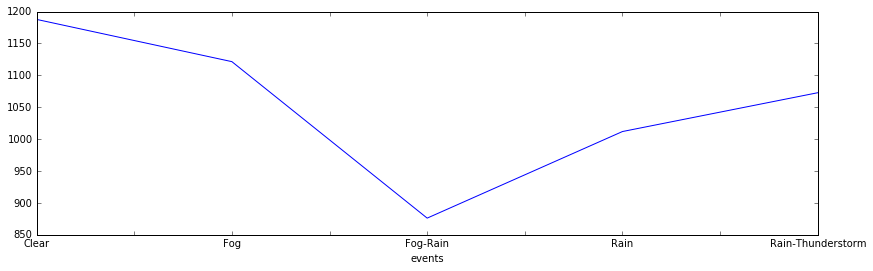

In [112]:
trips_with_stationweather.groupby('events').mean()['duration'].plot(figsize=(14,4));

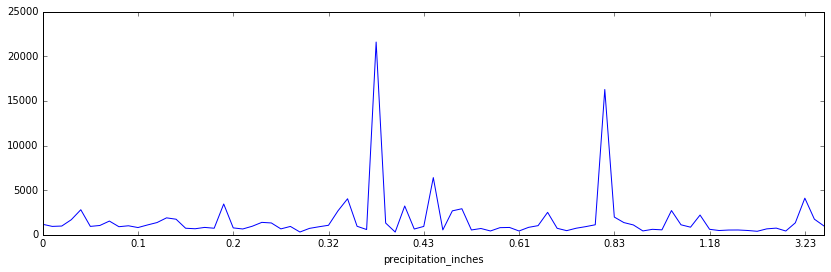

In [113]:
trips_with_stationweather.groupby('precipitation_inches').mean()['duration'].plot(figsize=(14,4));

Naturalmente, los viajes más largos se dan con días los despejados, los más lindos. Seguido bastante cerca por dias con niebla y visibilidad reducida. Esto es un poco extraño ya que tenemos en cuenta que, como vimos antes, los viajes más largos corresponden a clientes casuales y paseos no rutinarios, es decir, no responde la obligación de los suscriptores de ir a trabajar en bicicleta, por ejemplo. Estos significa que la gente alquila las bicicletas a pesar de la niebla. También tiene sentido que los viajes de menor duración se den los días que hay tanto lluvia como niebla.

Sin embargo, mirando los eventos de lluvias y tormentas, vemos que la duración de los viajes no se reduce tanto como debería, o como uno pensaría. De hecho, los días de tormenta los viajes duran más que los de lluvia normales. Esto sumado a los aparentemente aleatorios picos en la duración de viajes por cantidad de lluvia da la impresión de que la data correspondiente a estos eventos no parece estar del todo correcta.

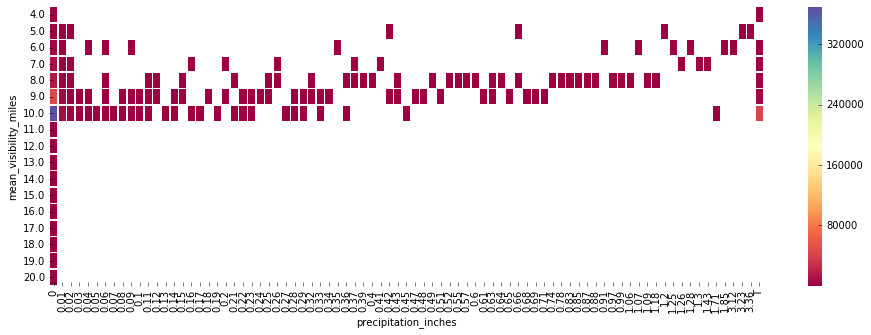

In [114]:
#df.pivot(index='date', columns='variable', values='value')
prec_and_vis = pd.DataFrame({'TRIP_COUNT' : trips_with_stationweather.groupby(['mean_visibility_miles', 'precipitation_inches'])['trip_id'].count()}).reset_index()
prec_and_vis = prec_and_vis.pivot('mean_visibility_miles', 'precipitation_inches', 'TRIP_COUNT')
fig, ax = plt.subplots(figsize=(16,5));
ax = sns.heatmap(prec_and_vis, cmap = "Spectral",annot=False, linewidths=.5)

Hay mayor cantidad de viajes a una visibilidad de 10 millas y sin precipitaciones. Además, para sin precipitaciones no se tienen viajes a no ser que haya visibilidad de 10 millas pero porque no suele haber otra visibilidad cuando no hay precipitaciones, es decir no se tienen esos datos combinados

In [121]:
weather.columns.values

array(['date', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'events', 'wind_dir_degrees',
       'zip_code', 'city'], dtype=object)

In [136]:
print trips_with_stationweather.shape


trips_with_stationweather.columns.values

(545103, 42)


array(['trip_id', 'duration', 'date', 'season', 'start_station_name',
       'start_station_id', 'start_time', 'start_hour', 'day_of_week',
       'end_time', 'end_hour', 'end_station_name', 'end_station_id',
       'subscription_type', 'station_id', 'name', 'dock_count', 'city',
       'coordinates', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'events', 'wind_dir_degrees',
       'zip_code'], dtype=object)

In [53]:
trips_with_stationweather.plot.scatter('duration','mean_wind_speed_mph', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);
plt.ylim(0,500);

NameError: name 'trips_with_stationweather' is not defined

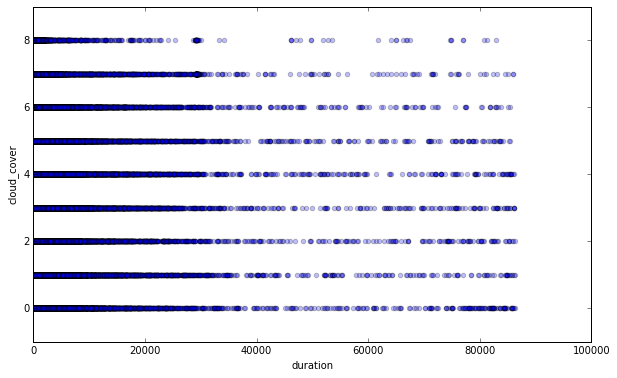

In [131]:
trips_with_stationweather.plot.scatter('duration','cloud_cover', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

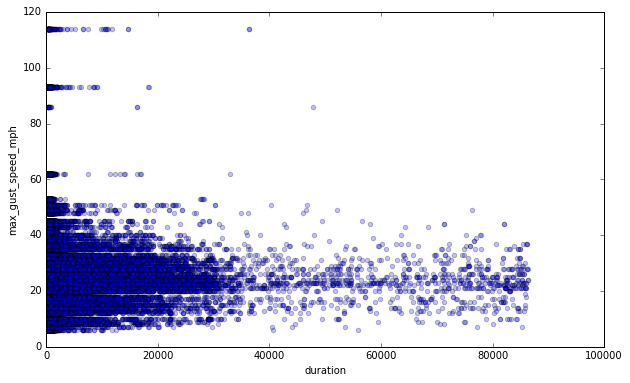

In [130]:
trips_with_stationweather.plot.scatter('duration','max_gust_speed_mph', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

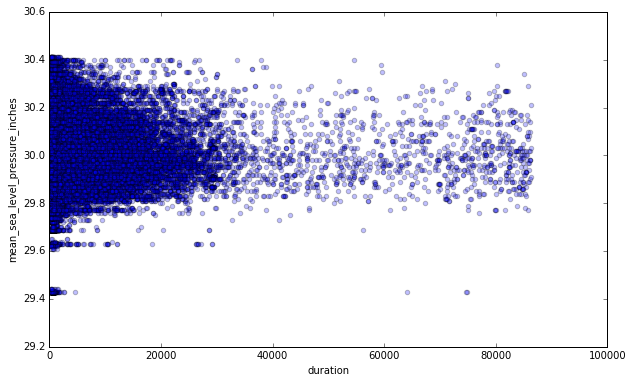

In [129]:
trips_with_stationweather.plot.scatter('duration','mean_sea_level_pressure_inches', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

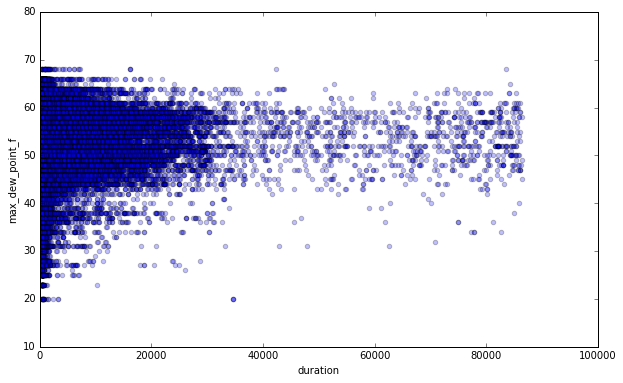

In [122]:
trips_with_stationweather.plot.scatter('duration','max_dew_point_f', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

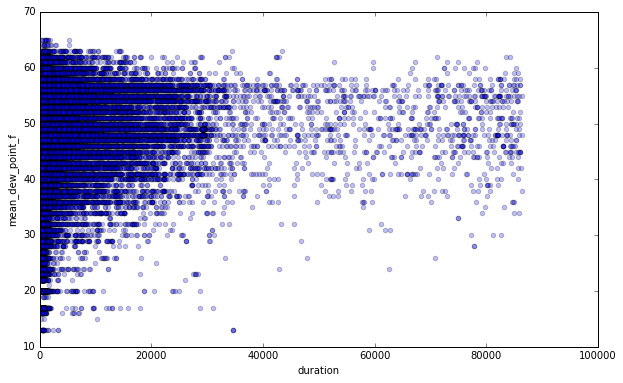

In [123]:
trips_with_stationweather.plot.scatter('duration','mean_dew_point_f', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

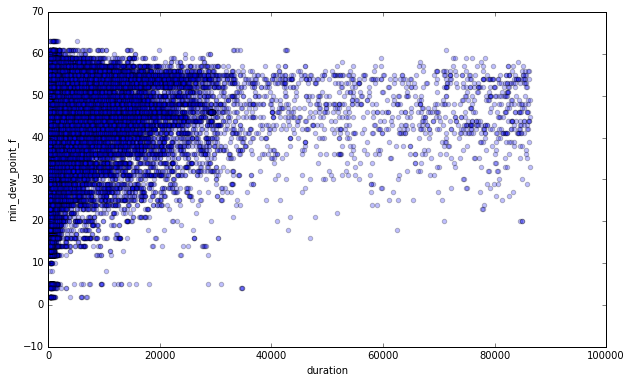

In [124]:
trips_with_stationweather.plot.scatter('duration','min_dew_point_f', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

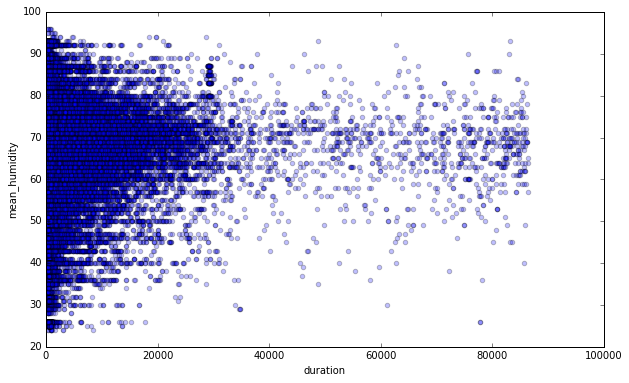

In [126]:
trips_with_stationweather.plot.scatter('duration','mean_humidity', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

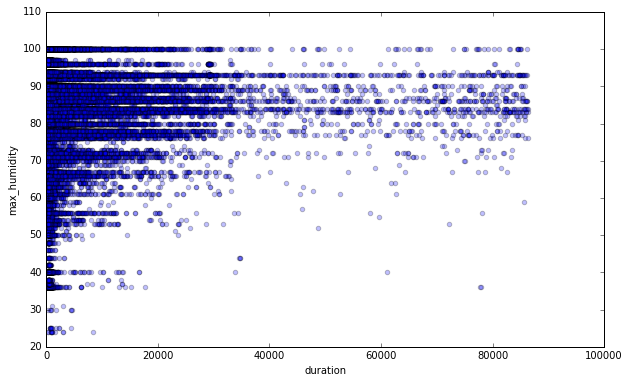

In [127]:
trips_with_stationweather.plot.scatter('duration','max_humidity', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

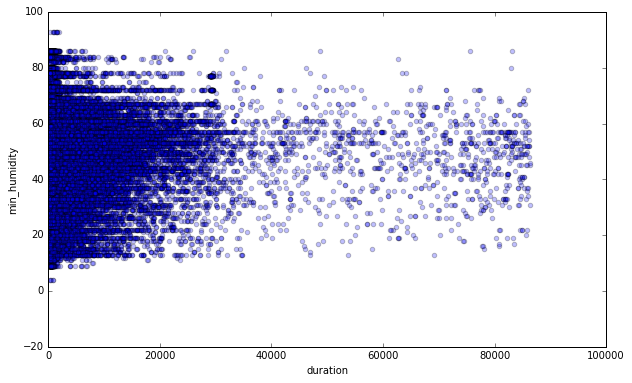

In [128]:
trips_with_stationweather.plot.scatter('duration','min_humidity', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

## Según temperatura

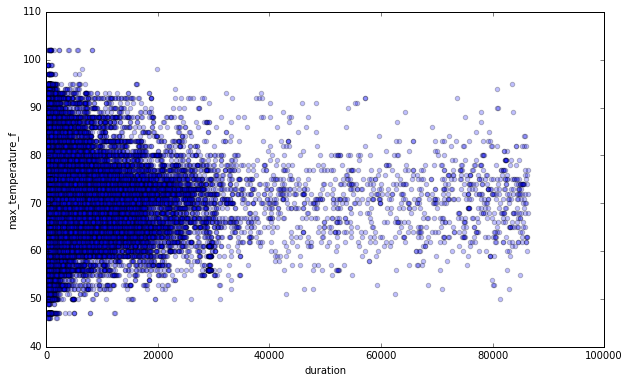

In [115]:
trips_with_stationweather.plot.scatter('duration','max_temperature_f', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

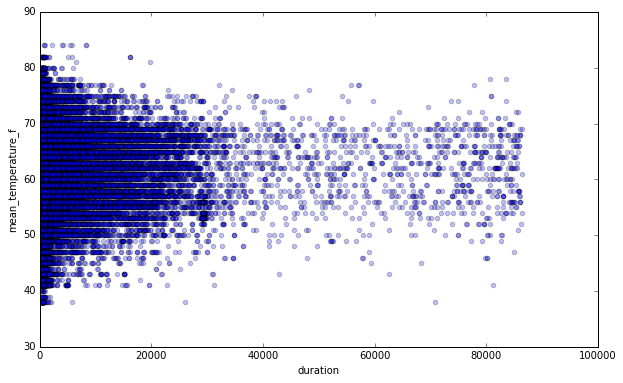

In [120]:
trips_with_stationweather.plot.scatter('duration','mean_temperature_f', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

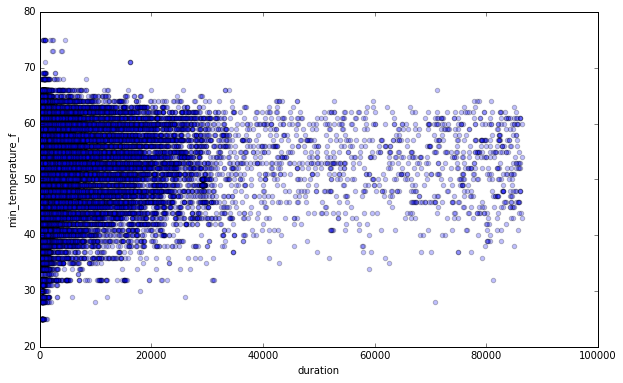

In [116]:
trips_with_stationweather.plot.scatter('duration','min_temperature_f',alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

Los gráficos nos permiten ver que la temperatura mínima no suele influir en la duración de los viajes, mas las mayores duraciones se concentran alrededor de los 75°F (24 °C) o 60°F (15°C) de temperatura máxima. Se puede observar también una pendiente pronunciada cuando la temperatura se acerca a los 90°F (32°C), lo cual nos puede parecer raro porque no es tan alta, pero lo más probable es que la temperatura suela subir tanto en estas ciudades. Como vemos, de hecho, la temperatura máxima a penas supera los 100°F (37°C).

## Según visibilidad

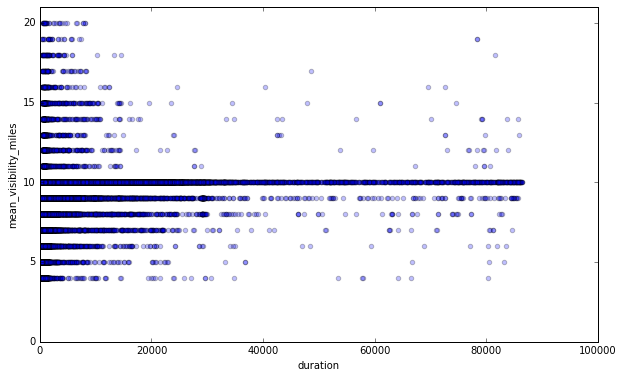

In [117]:
trips_with_stationweather.plot.scatter('duration','mean_visibility_miles', alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);
plt.ylim(0,21);

En este gráfico podemos ver claramente la diferencia entre los días despejados (por defecto un día normal tiene visibilidad de 10 millas) y los días de visibilidad reducida causada probablemente por niebla. Estos datos corresponden con lo que uno supondría que pasa, a menor visibilidad, menor duración de viajes. Mas cabe mencionar que visibilidad mayor de 10 millas es un suceso extraño, como dijimos un día despejado normal le corresponden 10 millas no más. Además no se observa ninguna pendiente de correlación. Es posible esos datos sean erróneos.

## Según el viento

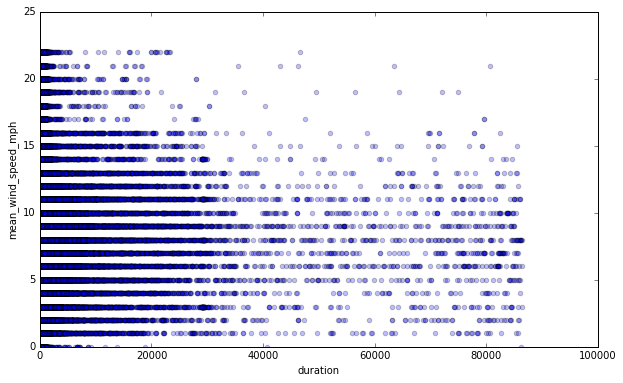

In [118]:
trips_with_stationweather.plot.scatter('duration','mean_wind_speed_mph',alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);
plt.ylim(0,25);

## Segun nubosidad

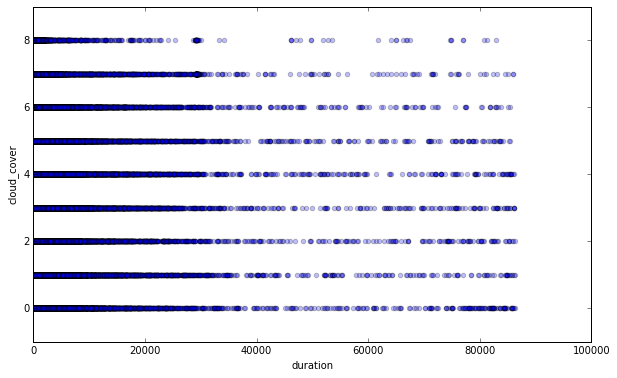

In [119]:
trips_with_stationweather.plot.scatter('duration','cloud_cover',alpha=0.25,figsize=(10,6));
plt.xlim(0,100000);

Si bien se observa una clara menor duración de viajes en el mayor nivel nubosidad, concluímos que esta no influye de manera considerable.

## Conclusiones finales

Finalmente, luego de este analisis podemos concluir en que existe una clara tendencia en cuanto al comportamiento de los clientes. Los suscriptores suelen alquilar las bicicletas para realizar viajes cortos, durante las horas pico de los días hábiles, más probable para ir a trabajar, y no se ven influenciado por la época del año. Los clientes casuales por el otro lado aportan un numero mucho menor de viajes, pero son de mayor duración. Se concentran en días despejados y de temperatura agradable, en verano y los fines de semana.

A futuro, como mencionamos, sería interesante el aporte de una base de datos acerca de los modelos y caracteristicas de bicicletas, ya que ya poseemos los bike_ids. Esto serviría para analizar que facciones de una bicicleta se usan más durante ciertos eventos climáticos, que modelos son los favoritos, etc. A su vez, también estaría bueno identificar a cada cliente con un id, y así poder identificar el comportamiento por usuario, para ambos tipos de suscripcion. En particular los clientes casuales usuales del sistema, es decir, aquellos clientes que habituan alquilar bicicletas, para pasear/ejercitar o trasladarse, sin haberse suscripto al sistema, y hallar los motivos por los que sucede. Además, sería más limpia y más precisa la base de datos si no se registraran las bicicletas que se retiran para reparación, o mejor aún, que se las marque de forma clara. De más esta tambien mencionar que los errores como las duraciones mayores a 24hrs y los diferentes zip_codes, o incluso las duraciones cortas que consideramos 'reparacion', deberian ser corregidos.